# Assignment_12_Solution:

Submitted By: ANSARI PARVEJ

#### 1. Describe the Quick R-CNN architecture ?

**Ans:** 
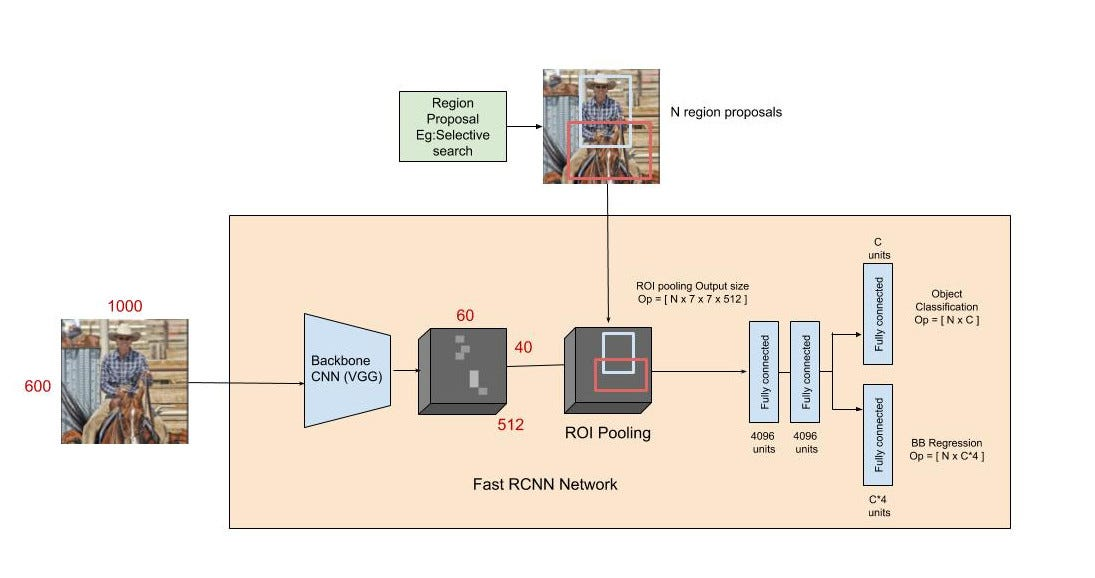
Quick R-CNN is a faster version of R-CNN that addresses some of the limitations of the original model, particularly in terms of speed and memory usage. Quick R-CNN replaces the multi-stage pipeline of R-CNN with a single, unified model that learns to perform both object classification and bounding box regression in a single forward pass.

The architecture of Quick R-CNN can be divided into two main components: a convolutional network that extracts features from the input image, and a region of interest (RoI) pooling layer that extracts fixed-length feature vectors from the features corresponding to each region proposal.

The convolutional network in Quick R-CNN is typically a pre-trained deep convolutional neural network, such as VGG or ResNet, that is fine-tuned on the task of object detection. The network takes an input image and outputs a feature map that captures the semantic content of the image.

The RoI pooling layer takes the feature map and a set of region proposals as input and outputs fixed-length feature vectors corresponding to each proposal. The RoI pooling layer first quantizes each region proposal to the spatial resolution of the feature map and then applies max pooling to each sub-region of the feature map that corresponds to the proposal. The output of the RoI pooling layer is a fixed-length feature vector for each region proposal that can be used for object classification and bounding box regression.

The fixed-length feature vectors are then fed into two fully connected layers: a classification layer that predicts the probability of each proposal containing an object of a particular class, and a regression layer that predicts the offsets of the predicted bounding box relative to the region proposal. The final output of the model is a set of class scores and bounding box coordinates for each region proposal.

Quick R-CNN achieves significant improvements in both speed and accuracy compared to R-CNN, while also simplifying the overall architecture and reducing memory usage.

#### 2. Describe two Fast R-CNN loss functions ?

**Ans:** Fast R-CNN is a popular object detection model that extends the region-based convolutional neural network (R-CNN) by introducing several modifications to improve speed and accuracy. The model includes two main loss functions that are used to train the network:

- Classification Loss (Cross-Entropy Loss): This loss function is used to train the network for accurate classification of objects in the image. It is calculated by taking the negative log-likelihood of the predicted probability distribution over the object classes. In other words, it measures the dissimilarity between the predicted class probability and the ground truth class label. The classification loss is computed over all object proposals and is defined as follows:

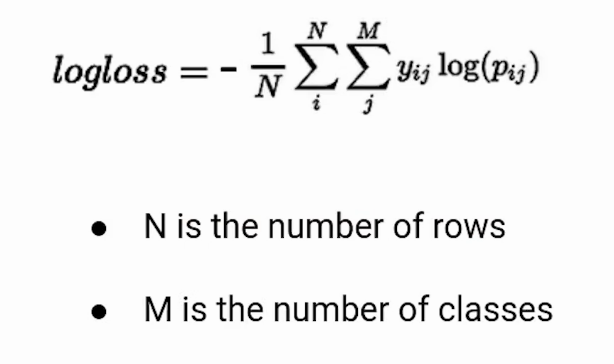

- where p is the predicted probability of the correct class, y is the ground truth class label (which is a binary vector indicating whether the object is present or not), and N is the total number of object proposals.

Bounding Box Regression Loss (Smooth L1 Loss): This loss function is used to train the network to accurately predict the object's bounding box coordinates. It measures the difference between the predicted box coordinates and the ground truth box coordinates using the smooth L1 loss function, which is less sensitive to outliers than the L2 loss function. The bounding box regression loss is computed over positive object proposals and is defined as follows:

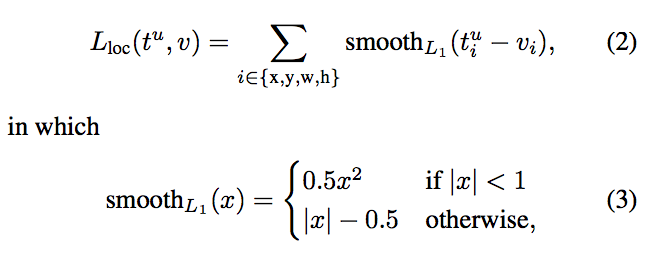

These two loss functions are combined using a weighted sum to form the overall loss function for Fast R-CNN. The weights are determined by hyperparameters that can be tuned during training to optimize the model's performance.

#### 3. Describe the DISABILITIES OF FAST R-CNN ?

**Ans:** Fast R-CNN has several limitations, including:

Fixed RoI pooling:
- Fast R-CNN uses fixed-size RoI pooling to convert each RoI into a fixed-size feature map. This approach is computationally efficient but leads to information loss because it discards the spatial information within each RoI. This can limit the accuracy of object detection, especially for small objects.

High memory usage:
- Fast R-CNN requires a large amount of memory to store the intermediate feature maps and RoI features, which can be a limitation for low-end hardware devices. This high memory usage also limits the batch size that can be used during training, which can slow down the training process.

Slow training:
- Although Fast R-CNN is faster than its predecessor R-CNN, it still requires a significant amount of training time to learn the object detection task. This is because it uses a multi-stage training procedure that requires fine-tuning the entire network end-to-end.


#### 4. Describe how the area proposal network works ?

**Ans:** 
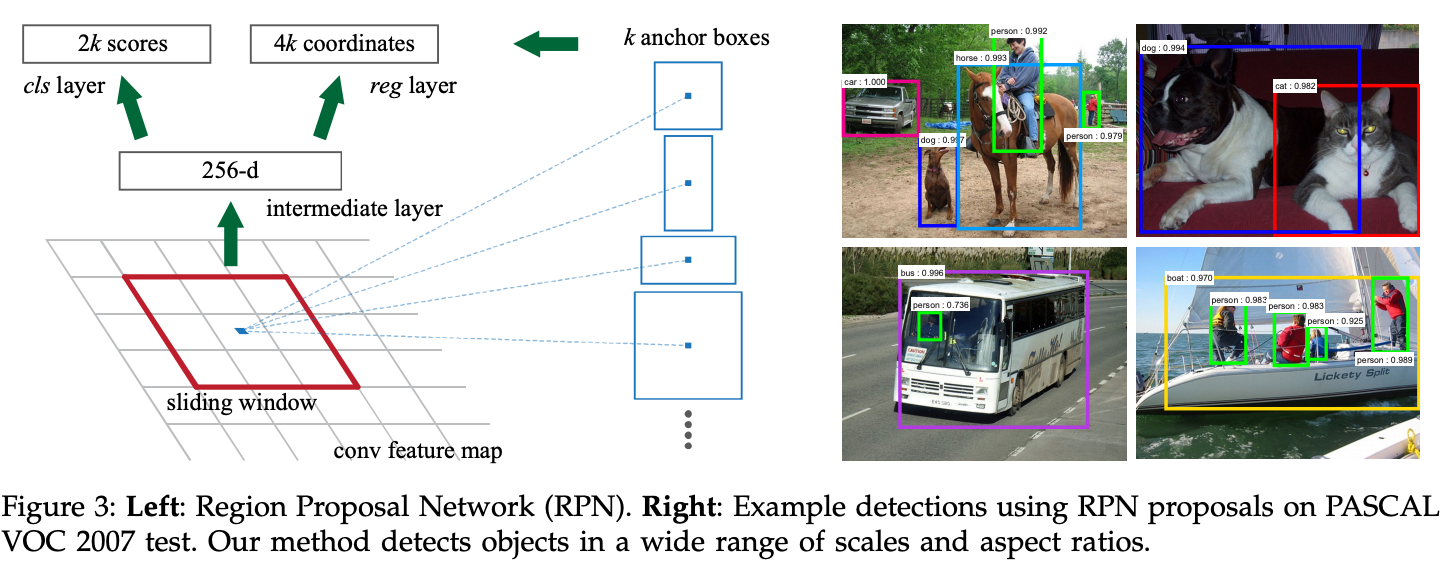
The Area Proposal Network (APN) is a module in the Faster R-CNN object detection framework that generates object proposals within an image. It takes as input a feature map obtained from a convolutional neural network (CNN) and generates a set of candidate regions, which are subsequently classified by a region classification network.

The APN module uses a sliding window approach to generate object proposals. It generates a set of anchor boxes at different scales and aspect ratios and slides them over the feature map. Each anchor box is associated with a set of learnable parameters that adjust its position and size to better fit the objects within the image.

For each anchor box, the APN module predicts two values: the probability of the box containing an object and the offsets of the box's position and size relative to the anchor box. These predictions are made using two convolutional layers with shared weights across all anchor boxes.

To reduce the number of candidate regions and improve the efficiency of the algorithm, the APN module applies Non-Maximum Suppression (NMS) to remove redundant bounding boxes. The remaining bounding boxes are then used as proposals for the region classification network, which is responsible for classifying each proposal as either background or one of the object classes.

Overall, the APN module plays a crucial role in the Faster R-CNN framework by efficiently generating object proposals and reducing the search space for object detection. It is a key component that enables the Faster R-CNN to achieve state-of-the-art performance on object detection tasks.

#### 5. Describe how the RoI pooling layer works ?

**Ans:** 
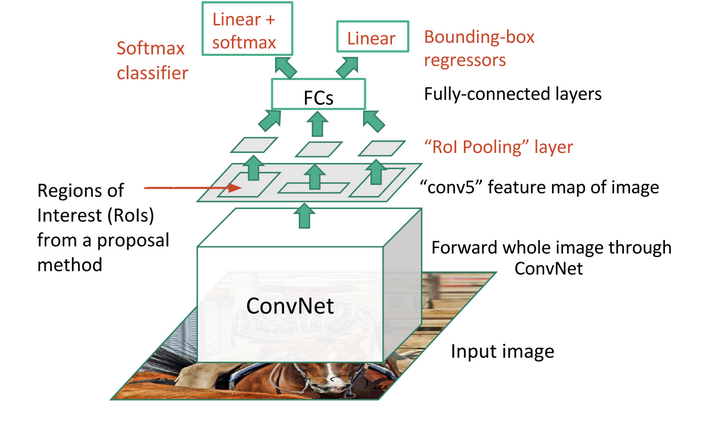
The RoI (Region of Interest) pooling layer is a crucial component in the Faster R-CNN object detection framework that takes as input a set of region proposals and extracts fixed-size feature maps for each proposal, which are subsequently fed into a fully connected network for classification.

The RoI pooling layer is designed to address the problem of variable-sized region proposals generated by the APN module. It takes as input a feature map obtained from a convolutional neural network (CNN) and a set of region proposals, each specified by its coordinates and scale relative to the original image.

The RoI pooling layer divides each region proposal into a fixed number of bins (e.g., 7x7) and computes the maximum value of each bin within the proposal. This operation effectively extracts a fixed-size feature map for each proposal, regardless of its size and aspect ratio.

To compute the output values for each bin in the RoI feature map, the RoI pooling layer uses bilinear interpolation to pool the values from the corresponding locations in the input feature map. The resulting feature map is then fed into a fully connected network for object classification and localization.

#### 6. What are fully convolutional networks (FCNs) and how do they work?  

**Ans:** 
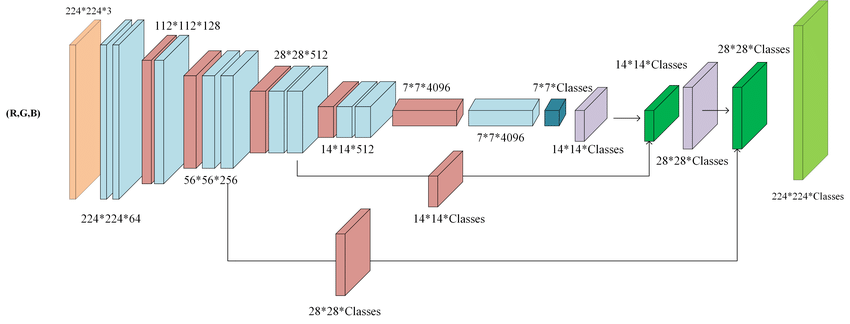
Fully Convolutional Networks (FCNs) are a type of neural network architecture that is designed for image segmentation tasks. Unlike traditional convolutional neural networks (CNNs) that are used for image classification, FCNs can output a segmentation map with the same spatial resolution as the input image.

FCNs are composed of a series of convolutional layers, which extract features from the input image at different scales. The output of each convolutional layer is a feature map, which represents a different level of abstraction of the input image. The final feature map is typically downsampled to reduce the spatial resolution and increase the receptive field size of the network.

To perform image segmentation, the FCN takes an input image and passes it through the series of convolutional layers to extract a series of feature maps. The feature maps are then upsampled to the original input image size using transposed convolutional layers or other upsampling methods. During the upsampling process, the feature maps are combined to produce a final segmentation map that assigns a class label to each pixel in the input image.

One important aspect of FCNs is the use of skip connections, which enable the network to capture both local and global information in the input image. Skip connections bypass the downsampled feature maps and connect the upsampled feature maps directly to the corresponding feature maps at the original resolution. This allows the network to refine the segmentation map with finer-grained information from the original input image.

#### 7. What are anchor boxes and how do you use them ?

**Ans:** 
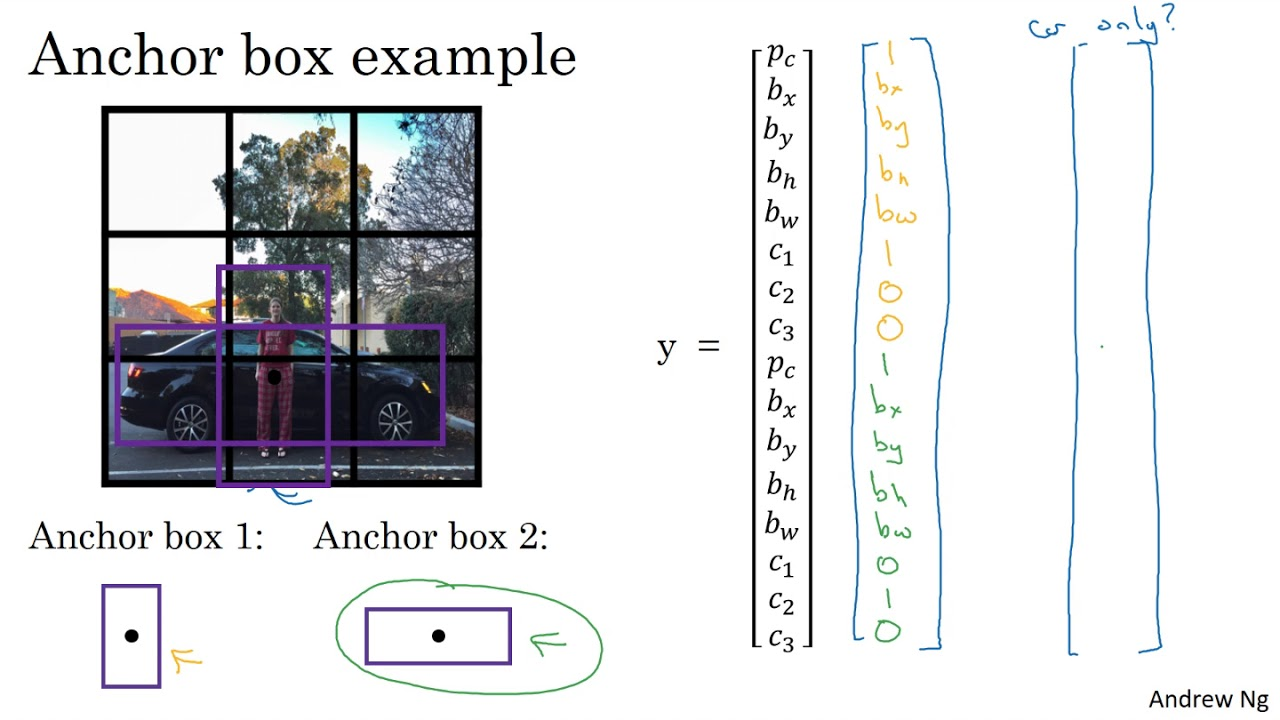
Anchor boxes are a set of predefined bounding boxes that are used in object detection tasks to improve the accuracy of the object localization. The idea behind anchor boxes is to predict the location of an object in an image by predicting its bounding box coordinates relative to the anchor boxes, instead of predicting the absolute coordinates of the bounding box.

Anchor boxes are typically defined as a set of fixed aspect ratios and scales, which represent different sizes and shapes of objects. During training, the anchor boxes are overlaid on the ground truth bounding boxes to determine which anchor boxes should be used to predict each object.

The process of using anchor boxes in object detection involves the following steps:

- Generate a set of anchor boxes with different aspect ratios and scales.

- For each anchor box, compute its intersection over union (IoU) with the ground truth bounding boxes in the training data.

- Assign each anchor box to the ground truth bounding box with the highest IoU.

- Compute the regression targets for each assigned anchor box, which represent the offset between the anchor box and the ground truth bounding box.

- Train the object detection model to predict the regression targets and the class probabilities for each assigned anchor box.

During inference, the object detection model predicts the class probabilities and regression targets for each anchor box in the image. The predicted bounding boxes are then computed by applying the regression targets to the corresponding anchor boxes.

#### 8. Describe the Single-shot Detector's architecture (SSD).

**Ans:** 
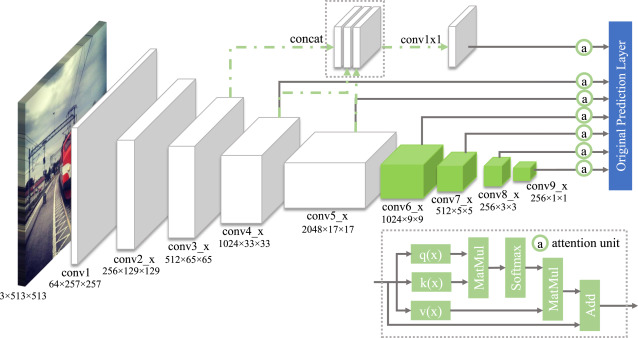
The Single Shot Detector (SSD) is a popular object detection architecture that was first introduced in 2016. It is a fully convolutional neural network that can detect objects in an image with a single forward pass through the network, hence the name "single shot".

The architecture of SSD consists of a base convolutional network, such as VGG or ResNet, followed by a series of convolutional layers that progressively reduce the spatial resolution of the feature maps while increasing their depth. This is known as the "feature pyramid".

On top of the feature pyramid, SSD adds a set of convolutional layers, called the "detection heads", that generate the object detection predictions. The detection heads consist of a set of convolutional filters that predict the class scores and bounding box offsets for a fixed set of default boxes or anchor boxes, similar to the Faster R-CNN model. The difference is that SSD predicts the class scores and bounding box offsets for each default box at multiple scales and aspect ratios, rather than for a single scale and aspect ratio.

To generate the final set of object detections, the predicted bounding boxes are decoded by applying the offsets to the default boxes and then clipping them to the image boundaries. Non-maximum suppression (NMS) is then applied to remove overlapping detections with lower confidence scores.

One of the advantages of SSD is its efficiency, as it can detect objects in an image with a single forward pass through the network, which makes it faster than two-stage object detection models like Faster R-CNN. However, one of the limitations of SSD is that it can struggle to detect small objects or objects with unusual aspect ratios, due to the fixed set of anchor boxes used in the detection heads.

#### 9. HOW DOES THE SSD NETWORK PREDICT ?

**Ans:** The SSD network predicts object detections by making predictions at multiple locations and scales in the image. Specifically, the network generates a set of default boxes or anchor boxes at each location in the feature map and at different scales and aspect ratios. Each default box is associated with a set of class scores and bounding box offsets, which are predicted by the network.

To predict the class scores and bounding box offsets for each default box, SSD applies a set of convolutional filters to the feature map at each location. These filters are designed to predict the class probabilities and bounding box offsets for each default box, for a fixed set of object classes and anchor box parameters.

The class scores indicate the probability that each default box contains an object of a particular class. The bounding box offsets indicate how much the default box needs to be adjusted to better fit the object's location and size.

The network predicts the class scores and bounding box offsets for each default box at different scales and aspect ratios, which allows it to detect objects of different sizes and shapes. Once the predictions have been made, a post-processing step, such as non-maximum suppression (NMS), is applied to remove overlapping detections and output the final set of object detections with their corresponding class labels and bounding boxes.

#### 10. Explain Multi Scale Detections. 

**Ans:** Multi-scale detection refers to the process of detecting objects at different scales in an image. It is commonly used in object detection tasks to detect objects of different sizes and aspect ratios, and it is a key component of many state-of-the-art object detection models.

The basic idea behind multi-scale detection is to apply object detection at multiple scales, such as by resizing the input image to different resolutions or using image pyramids. This allows the detector to detect objects at both small and large scales, without having to adjust the parameters of the detector for each scale.

One common approach to multi-scale detection is to use an image pyramid, which involves generating a set of images at different scales by either up-sampling or down-sampling the original image. The object detector is then applied to each image in the pyramid to detect objects at different scales.

Another approach is to use a single-scale detector that is applied to a set of images that have been resized to different resolutions. This can be more computationally efficient than using an image pyramid, but may result in lower detection performance.

#### 11. What are dilated (or atrous) convolutions ?

**Ans:** 
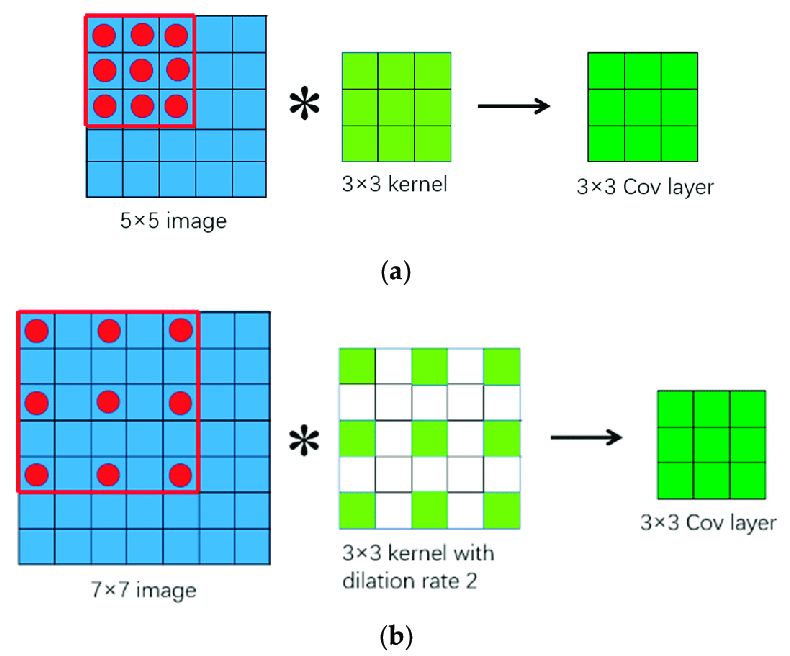
Dilated convolutions, also known as atrous convolutions, are a type of convolutional operation used in deep learning for tasks such as image segmentation, object detection, and image synthesis.

In a standard convolution operation, the filter is applied to every pixel in the input image with a fixed stride. This can be computationally expensive and can result in a high level of spatial resolution loss as the convolutional layers are stacked. Dilated convolutions address this issue by adding gaps or dilations to the filter, allowing it to cover a larger region of the input image with a reduced number of operations.

In dilated convolutions, the filter is applied to the input image with a dilation rate, which determines the spacing between the values in the filter. This allows the filter to cover a larger region of the input image without increasing the number of parameters or the size of the filter. The dilation rate can be increased in each layer of the network to increase the receptive field of the filters, which enables the network to capture more global information from the input image.